Session (Cookie) -> 인증된 사용자 정보 -> 서버 안쪽 데이터
- [Name : Value] ; domain/path/expired ...
- Cookie -> Client Browser (temporal path ; webdb ...)
-> requests.request*(get,post,...) **cookies = {k:v}
    cookie jar object <= cookie_jar_from_dict
    cookie 매번 관리 (set-cookie)
-> Session().request* (get,post,...)
    request vs. session.request ; cookie 관리 주체
-> Browser Cookie => Cookie dict, jar
e.g., LMS(RESTful API), Naver(Mail, Cafe, .. )
      SNS(Instagram) ; API (인증 X, 허가 X, )
      cookie;header;X-CSRF-TOKEN <- /(RE)
      params['euc-kr']



## 🔎 지난 내용 리마인드
### 1. 

In [242]:
from requests import request
from requests.compat import *
from requests.sessions import Session
from bs4 import BeautifulSoup
import re

headers = {
    'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

In [243]:
url = 'https://www.instagram.com'
session = Session()
resp = session.request('GET', url)

In [244]:
resp.status_code, resp.reason, resp.headers

(200,
 'OK',
 {'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'critical-ch': 'Sec-CH-UA-Model', 'accept-ch-lifetime': '4838400', 'accept-ch': 'Sec-CH-Prefers-Color-Scheme,Sec-CH-UA-Full-Version-List,Sec-CH-UA-Platform-Version', 'reporting-endpoints': 'default="https://www.instagram.com/error/ig_web_error_reports/?device_level=unknown"', 'report-to': '{"max_age":259200,"endpoints":[{"url":"https:\\/\\/www.instagram.com\\/error\\/ig_web_error_reports\\/?device_level=unknown"}]}', 'content-security-policy-report-only': "default-src *.facebook.com *.fbcdn.net *.instagram.com data: blob:;script-src *.facebook.com *.fbcdn.net *.facebook.net 'unsafe-inline' 'unsafe-eval' blob: data: 'self' *.teststagram.com *.instagram.com static.cdninstagram.com *.google-analytics.com *.google.com;style-src data: blob: 'unsafe-inline' *.fbcdn.net *.facebook.com *.instagram.com *.teststagram.com static.cdninstagram.com;connect-src *.facebook.com facebook.com *.fbcdn.net *.facebook.net wss://*.facebook

'<!DOCTYPE html><html class="_9dls" lang="en" dir="ltr"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" rel="icon" sizes="192x192" href="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" /><meta name="robots" content="noarchive, noimageindex" /><meta charset="utf-8" /><meta name="apple-mobile-web-app-status-bar-style" content="default" /><meta name="mobile-web-app-capable" content="yes" /><meta id="viewport" name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" /><meta name="theme-color" content="#ffffff" /><link rel="apple-touch-icon" sizes="76x76" href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png" /><link rel="apple-touch-icon" sizes="120x120" href="https://static.cdninstagram.com/rsrc.php/v3/ys/r/aM-g435MtEX.png" /><link rel="apple-touch-icon" sizes="152x152" href="https://static.cdninstagram.com/rsrc.php/v3/yx/r/H1l_HHqi4p6.png" /><link
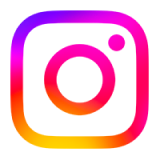
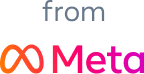

In [245]:
resp.text

In [246]:
CSRF = re.search(r'csrf_token\\":\\"(.+?)\\"', resp.text).group(1)

In [247]:
CSRF

'vDStFfdeLQZkCZoZqj4Qu8Dd0OonIr6D'

In [248]:
# 인스타그램
ajax = 'https://www.instagram.com/api/v1/web/accounts/login/ajax/'
params = {
    'enc_password': '',
    'optIntoOneTap': 'false',
    'queryParams': '{}',
    'trustedDeviceRecords': '{}',
    'username': ''
}
params['username'] = 'wodudiu210@gmail.com'

In [249]:
from datetime import datetime

T = int(datetime.now().timestamp())
PW = 'unitwo4679!'
params['enc_password'] = f'#PWD_INSTAGRAM_BROWSER:0:{T}:{PW}'

In [250]:
resp = session.post(ajax, data=params)

In [251]:
resp.text

'{"message":"CSRF token missing or incorrect","status":"fail"}'

In [252]:
headers = {
    'x-csrftoken' : CSRF
}

resp = request('POST', ajax, data=params, headers=headers)

In [253]:
session.cookies.get('csrftoken')

'sBj8c5xNTQXlzBchI8n2oKYS13cjQmzX'

In [254]:
resp.text

'{"user":true,"userId":"60803301160","authenticated":true,"oneTapPrompt":true,"status":"ok"}'

In [255]:
headers

{'x-csrftoken': 'vDStFfdeLQZkCZoZqj4Qu8Dd0OonIr6D'}

In [256]:
print(resp.text)

{"user":true,"userId":"60803301160","authenticated":true,"oneTapPrompt":true,"status":"ok"}


In [257]:
headers['x-csrftoken'] = session.cookies.get('csrftoken')
resp = session.post(ajax, data=params,
                    headers=headers)
resp.text

'{"user":true,"userId":"60803301160","authenticated":true,"oneTapPrompt":true,"status":"ok"}'

In [258]:
search = 'https://www.instagram.com/api/v1/web/search/topsearch/'
params = {
    'context' : 'blended',
    'include_reel' : 'true',
    'query' : '',
    'rank_token' : '0.061648351235403354',
    'search_surface' : 'web_top_search'
}


In [259]:
params['query'] = '뉴진스'
headers['x-csrftoken'] = session.cookies.get('csrftoken')
resp = session.get(search, params=params, headers=headers)

In [260]:
resp.json()

{'users': [{'position': 0,
   'user': {'has_anonymous_profile_picture': False,
    'fbid_v2': 17841442336192889,
    'pk': '42343115206',
    'pk_id': '42343115206',
    'username': 'official.newjeans',
    'full_name': 'NewJeans 뉴진스',
    'is_private': False,
    'is_verified': False,
    'profile_pic_id': '2887334722373425484_42343115206',
    'profile_pic_url': 'https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-19/294503123_1663687497334645_7728765606903984238_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-gmp1-1.cdninstagram.com&_nc_cat=101&_nc_ohc=Z6u93GM0C7cAX_8PEEq&edm=AHG7ALcBAAAA&ccb=7-5&oh=00_AfDklheSeE4L_TyTQPJhe0vLyVozhvI36dVP52Ksy3vqug&oe=64BB1517&_nc_sid=c9086e',
    'has_opt_eligible_shop': False,
    'account_badges': [],
    'birthday_today_visibility_for_viewer': 'NOT_VISIBLE',
    'third_party_downloads_enabled': 0,
    'friendship_status': {'following': False,
     'is_private': False,
     'incoming_request': False,
     'outgoing_request': False,
     'is_bestie': F

In [261]:
resp.headers['set-cookie']

'csrftoken=SrlbaPLIxTfAHThT7TktvIZs8UbK0QlU; Domain=.instagram.com; expires=Tue, 16-Jul-2024 03:13:02 GMT; Max-Age=31449600; Path=/; Secure, rur="CCO\\05460803301160\\0541721185982:01f78fd4d5e4b0a6494b403fa9cb6279061400f6a508940d4c4696672045d4fdddaa85c2"; Domain=.instagram.com; HttpOnly; Path=/; SameSite=Lax; Secure, ds_user_id=60803301160; Domain=.instagram.com; expires=Mon, 16-Oct-2023 03:13:02 GMT; Max-Age=7776000; Path=/; Secure'

In [262]:
resp.json()['users'][2]

{'position': 3,
 'user': {'has_anonymous_profile_picture': False,
  'fbid_v2': 17841452305264544,
  'pk': '52276359508',
  'pk_id': '52276359508',
  'username': 'haerin.hybe',
  'full_name': 'NEWJEANS HAERIN (뉴진스 해린)',
  'is_private': False,
  'is_verified': False,
  'profile_pic_id': '3145317928144401250_52276359508',
  'profile_pic_url': 'https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-19/359810958_696470992343150_877049650217005383_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-gmp1-1.cdninstagram.com&_nc_cat=1&_nc_ohc=_lQ3Vyh_FUAAX8l1xuK&edm=AHG7ALcBAAAA&ccb=7-5&oh=00_AfC5vqP7_sAqceBNZAYHUxvRbYYUjd64_sul_AspKdf-Kg&oe=64BA1F0C&_nc_sid=c9086e',
  'has_opt_eligible_shop': False,
  'account_badges': [],
  'birthday_today_visibility_for_viewer': 'NOT_VISIBLE',
  'third_party_downloads_enabled': 0,
  'friendship_status': {'following': False,
   'is_private': False,
   'incoming_request': False,
   'outgoing_request': False,
   'is_bestie': False,
   'is_restricted': False,
   'is_feed_fa

In [263]:
data = resp.json()

In [264]:
data['hashtags'][0]['hashtag']

{'name': '뉴진스',
 'id': 17843684476047345,
 'media_count': 363938,
 'use_default_avatar': True,
 'search_result_subtitle': '363K posts'}

In [265]:
if data['users']:
    users = data['users'][0]['user']['pk']
    
else:
    hashtags = data['hashtags'][0][]
    

SyntaxError: invalid syntax (625893688.py, line 5)

In [ ]:
while data['hashtags'] or count == 10:
    count = 0

    if data['users']:
        users = data['users'][count]['user']['pk']
        feed = f'https://www.instagram.com/api/v1/feed/user/{users}/?'

    params = {
        'count' : count+1,
        #'max_id' : ''
    }

    headers['x-csrftoken'] = session.cookies.get('csrftoken')

    resp = session.get(feed, params=params, headers=headers)

    print(resp.text)



In [ ]:
resp.text

'{"message":"useragent mismatch","status":"fail"}'

In [ ]:
# 1. User-Agent
# 2. 검색 : 키워드 (PK)
# 3. User, Tag 판단
# 4. If User, 게시물 첫 페이지
# 5. 다음 페이지


In [ ]:
%pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 28.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [270]:
from selenium import webdriver

In [277]:
driver = webdriver.Chrome('./databaseCourses/chromedriver_mac_arm64.zip')

AttributeError: 'str' object has no attribute '_ignore_local_proxy'

In [ ]:
driver.current_window_handle

'F3A02DEB86882B4BA3FBAACCC3FA7A97'

In [ ]:
option = webdriver.ChromeOptions()

In [272]:
driver.quit()

In [ ]:
%pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [275]:
%pip install webdriver_manager==3.4.2


  Attempting uninstall: webdriver_manager
    Found existing installation: webdriver-manager 3.8.6
    Uninstalling webdriver-manager-3.8.6:
      Successfully uninstalled webdriver-manager-3.8.6
Note: you may need to restart the kernel to use updated packages.


In [278]:
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome()

In [280]:
driver.get('https://lms.sunde41.net')

In [281]:
from selenium.webdriver.common.by import By

In [282]:
By.CSS_SELECTOR, By.XPATH

('css selector', 'xpath')

In [283]:
for _ in driver.find_elements(By.CSS_SELECTOR, 'input[name]'):
    print(_.tag_name, _.text, _.get_attribute('value'))

input  /
input  
input  
input  on


In [284]:
dom2 = BeautifulSoup(driver.page_source)

In [285]:
type(dom2.select('form input[name]')[0]), \
type(driver.find_elements(By.CSS_SELECTOR, 'form input[name]')[0])

(bs4.element.Tag, selenium.webdriver.remote.webelement.WebElement)

In [286]:
tags = driver.find_elements(By.CSS_SELECTOR, 'form #email, form #password')

In [287]:
tags[0].clear()
tags[0].send_keys('unijellytwo@naver.com')

In [288]:
tags[0].get_attribute('value')

'unijellytwo@naver.com'

In [289]:
import json
with open('lms.txt', 'r') as f:
    lms = json.load(f)

In [293]:
tags[1].send_keys(lms['pw'])

In [295]:
for c in driver.get_cookies():
    session.cookies.set(c['name'], c['value'])

In [297]:
session.get('https://lms.sunde41.net').text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, shrink-to-fit=no">\n    <meta name="description" content="">\n    <meta name="author" content="">\n    <title> 로그인 : 고려대학교 지능정보SW아카데미</title>\n    <link href="/static/vendors/login.css" rel="stylesheet">\n    <link href="/static/vendors/bootstrap.css" rel="stylesheet">\n    <link href="/static/vendors/style.css?v=1.7" rel="stylesheet">\n    <link rel="shortcut icon" href="/static/favicon/favicon.ico" type="image/x-icon">\n    <link rel="icon" href="/static/favicon/favicon.ico" type="image/x-icon">\n    <style>\n        .m-form .m-form__group {\n        padding-top: 0;\n        padding-bottom: 0;\n        }\n    </style>\n</head>\n<body>\n    <div class="form-body without-side">\n        <div class="row">\n            <div class="img-holder">\n                <d

In [298]:
driver.delete_all_cookies()

In [300]:
driver.refresh()

In [335]:
email = driver.find_element(By.XPATH, '//form//input[@id="email"]')

In [336]:
pw = driver.find_element(By.XPATH, '//form//input[@id="password"]')

'unijellytwo@naver.com'

In [339]:
from selenium.webdriver.common.keys import Keys
email.send_keys(lms['id'])
pw.send_keys(lms['pw'])

In [340]:
driver.find_element(By.XPATH, '//input[@id="button"]').click()

In [341]:
email.is_displayed() # DOM이 변경되었기 떄문에, ID 값을 참조하지 않고, 그에 따른 에러가 발생한다.

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=114.0.5735.198); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
0   chromedriver                        0x0000000100907f48 chromedriver + 4226888
1   chromedriver                        0x00000001009004f4 chromedriver + 4195572
2   chromedriver                        0x0000000100544d68 chromedriver + 281960
3   chromedriver                        0x000000010055236c chromedriver + 336748
4   chromedriver                        0x0000000100549a78 chromedriver + 301688
5   chromedriver                        0x0000000100549a4c chromedriver + 301644
6   chromedriver                        0x000000010054862c chromedriver + 296492
7   chromedriver                        0x000000010054baf0 chromedriver + 310000
8   chromedriver                        0x00000001005b7800 chromedriver + 751616
9   chromedriver                        0x00000001005b6c58 chromedriver + 748632
10  chromedriver                        0x0000000100573f1c chromedriver + 474908
11  chromedriver                        0x0000000100574ef4 chromedriver + 478964
12  chromedriver                        0x00000001008c959c chromedriver + 3970460
13  chromedriver                        0x00000001008cd6f0 chromedriver + 3987184
14  chromedriver                        0x00000001008d35b4 chromedriver + 4011444
15  chromedriver                        0x00000001008ce2fc chromedriver + 3990268
16  chromedriver                        0x00000001008a61c0 chromedriver + 3826112
17  chromedriver                        0x00000001008ea088 chromedriver + 4104328
18  chromedriver                        0x00000001008ea1e0 chromedriver + 4104672
19  chromedriver                        0x00000001008f9f28 chromedriver + 4169512
20  libsystem_pthread.dylib             0x000000019b543fa8 _pthread_start + 148
21  libsystem_pthread.dylib             0x000000019b53eda0 thread_start + 8


In [342]:
driver.find_element(By.XPATH, '//ul//ul//li').click()

In [343]:
for a in driver.find_elements(By.CSS_SELECTOR, 'a[href$=".pdf"]'):
    print(a.tag_name, a.text, a.is_displayed())

a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a  False
a /static/uploads/ckeditors/2023-06-29_17-48-32_%EB%8D%B0%EC%B2%AD%EC%BA%A0%20%EC%B6%9C%EC%84%9D%EC%9D%B8%EC%A0%95%20%EA%B8%B0%EC%A4%80.pdf True


In [344]:
driver.find_element(By.CSS_SELECTOR, 'a:has( + div a[href$=".pdf"])').click()

In [345]:
driver.find_elements(By.CSS_SELECTOR, 'a[href$=".pdf"]')[0].is_displayed()

True

In [346]:
driver.find_elements(By.CSS_SELECTOR, 'a[href$=".pdf"]')[0].click()

is_enabled : button 활성화 여부
is_selected : 선택박스 선택 여부
is_displayed : 코드 상에 표시되는지 여부

In [347]:
driver.execute_script('alert("test");')

In [ ]:
driver.execute_async_script()

In [349]:
driver.get('https://www.naver.com')

In [352]:
driver.find_element(By.XPATH, '//*[@id="account"]/div/a').click()

In [360]:
id = driver.find_element(By.XPATH, '//*[@id="id"]')

In [361]:
pw = driver.find_element(By.XPATH, '//*[@id="pw"]')

In [362]:
with open('idpw.txt', 'r') as f:
    idpw = json.load(f)

id.send_keys(idpw['naver_id'])
pw.send_keys(idpw['naver_pw'])

In [363]:
driver.find_element(By.XPATH, '//*[@id="log.login"]').click()

In [364]:
cookie = {c['name']:c['value'] for c in driver.get_cookies()}

In [365]:
request('GET', 'https://mail.naver.com', cookies=cookie).text

'<!doctype html><html><head lang="ko"><meta charset="UTF-8"/><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,viewport-fit=cover"/><title>메일</title><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon"/><link rel="apple-touch-icon-precomposed" sizes="72x72" href="https://ssl.pstatic.net/static/pwe/naver_mail/hdpi_72X72.png"><link rel="apple-touch-icon-precomposed" sizes="96x96" href="https://ssl.pstatic.net/static/pwe/naver_mail/xhdpi_96x96.png"><link rel="apple-touch-icon-precomposed" sizes="144x144" href="https://ssl.pstatic.net/static/pwe/naver_mail/xxhpdi_144x144.png"><link rel="apple-touch-icon-precomposed" sizes="192x192" href="https://ssl.pstatic.net/static/pwe/naver_mail/xxxhpdi_192x192.png"><script>window.nhn = {};\n      window.gnb_option = {\n        gnb_service: "mail",\n        gnb_template: "gnb_utf8",\n        gnb_logout: "https://www.naver.com",\n        gnb_one_naver: 1,\n        gnb_item_hide_option: 8,\n   

In [368]:
driver.add_cookie

<bound method WebDriver.add_cookie of <selenium.webdriver.chrome.webdriver.WebDriver (session="7d19ee9fcfa6350bc7053c237a98666a")>>

In [369]:
driver.get('https://mail.naver.com')

In [370]:
logout = driver.find_element(By.XPATH, '//*[@id="gnb_logout_button"]')

In [372]:
logout.is_displayed()

False

In [375]:
logout.click()

In [376]:
from time import sleep # Process가 멈춘다.
driver.implicitly_wait(10) # display가 될 때까지 암묵적으로 기다려준다.

from selenium.webdriver.support.wait import WebDriverWait # 특정 오류 코드가 발생 또는 발생하지 않을 때까지 암묵적으로 기다려준다.

from selenium.webdriver.support import expected_conditions as EC # 특정 오류 코드가 발생 또는 발생하지 않을 때까지 암묵적으로 기다려준다.

In [377]:
wait = WebDriverWait(driver, 10, .5)

In [ ]:
wait.until(EC.element_to_be_clickable(logout))

In [ ]:
driver.current_url